# Ciencia dos dados Projeto 3

In [117]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
#importando o K Means para fazer o cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pickle

In [70]:
df = pd.read_csv('Tabela_minimizada.csv',sep=',')
df.head()

,Count,Name,Price,Rating,Review,Quantity,Brand,Brand_Number
0,0,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,I purchased this phone and didn't work,108,Samsung,8
1,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,"This item is terrible, the worst thing I ever ...",108,Samsung,8
2,2,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,"The phone worked very good the first month, th...",108,Samsung,8
3,3,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,5,im loven it,108,Samsung,8
4,4,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,only 1 star because this phone looks good it s...,108,Samsung,8


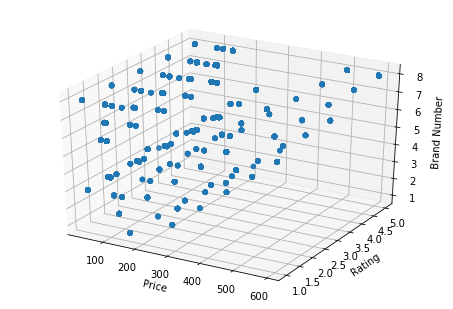

In [60]:
#Criando o gráfico 3D
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df.Price, df.Rating, df.Brand_Number)

ax.set_xlabel('Price')
ax.set_ylabel('Rating')
ax.set_zlabel('Brand Number')

pyplot.show()

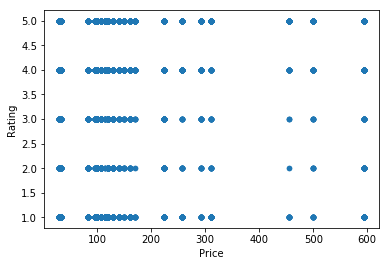

In [61]:
#Gráfico 2D
df.plot.scatter(x = 'Price', y = 'Rating')

In [71]:
#Naive Bayes dos comentários
import pickle
dteste = pickle.load(open('Bayes.p', 'rb'))
dteste.head()

,Teste,Rel,Resultado
0,I purchased this phone and didn't work,0,1
1,"This item is terrible, the worst thing I ever ...",0,1
2,"The phone worked very good the first month, th...",0,1
3,im loven it,1,1
4,only 1 star because this phone looks good it s...,0,0


In [81]:
#Colocando o Naive Bayes no DataFrame
df['Resultado'] = dteste.Resultado
#Duplicando a coluna 'Name' para juntar as médias posteriormente
df['Name1'] = df['Name']
df.head()

,Count,Name,Price,Rating,Review,Quantity,Brand,Brand_Number,Resultado,Name1
0,0,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,I purchased this phone and didn't work,108,Samsung,8,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co..."
1,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,"This item is terrible, the worst thing I ever ...",108,Samsung,8,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co..."
2,2,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,"The phone worked very good the first month, th...",108,Samsung,8,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co..."
3,3,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,5,im loven it,108,Samsung,8,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co..."
4,4,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,only 1 star because this phone looks good it s...,108,Samsung,8,0,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co..."


In [82]:
#Fazendo a média do Rating e do Naive Bayes de cada aparelho
df_rate = df.groupby('Name', as_index=False)['Rating'].mean()
df_res = df.groupby('Name', as_index=False)['Resultado'].mean()
df_res.head()

,Name,Resultado
0,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,0.860190
1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",0.861111
2,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,0.703704
3,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,0.629548
4,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,0.893424


In [83]:
#juntando ao DataFrame as médias (Rating)
df_joined = df.set_index('Name').join(df_rate.set_index('Name'), how='inner', lsuffix='_df', rsuffix='_df_rate')
df_joined.head()

,Count,Price,Rating_df,Review,Quantity,Brand,Brand_Number,Resultado,Name1,Rating_df_rate
Name,,,,,,,,,,
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),108,161.06,5,"I like this smartphone, good quality very very...",530,Lenovo,1,1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,4.033175
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),109,161.06,5,100% recomendado,530,Lenovo,1,1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,4.033175
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),110,161.06,5,excellent,530,Lenovo,1,1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,4.033175
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),111,161.06,5,THANKS A GOOD PRODUCT,530,Lenovo,1,1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,4.033175
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),112,161.06,5,I am satisfied with my purchase,530,Lenovo,1,1,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,4.033175


In [85]:
#juntando ao DataFrame as médias (Naive Bayes)
dfj = df_joined.set_index('Name1').join(df_res.set_index('Name'), how='inner', lsuffix='_df_joined', rsuffix='_df_res')
dfj.head()

,Count,Price,Rating_df,Review,Quantity,Brand,Brand_Number,Resultado_df_joined,Rating_df_rate,Resultado_df_res
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),108,161.06,5,"I like this smartphone, good quality very very...",530,Lenovo,1,1,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),109,161.06,5,100% recomendado,530,Lenovo,1,1,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),110,161.06,5,excellent,530,Lenovo,1,1,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),111,161.06,5,THANKS A GOOD PRODUCT,530,Lenovo,1,1,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),112,161.06,5,I am satisfied with my purchase,530,Lenovo,1,1,4.033175,0.86019


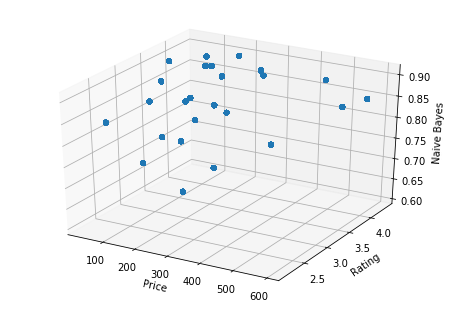

In [87]:
#Plotando o Gráfico 3D antes do cluster 
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(dfj.Price, dfj.Rating_df_rate, dfj.Resultado_df_res)

ax.set_xlabel('Price')
ax.set_ylabel('Rating')
ax.set_zlabel('Naive Bayes')

pyplot.show()

In [136]:
#Reduzindo o Data Frame para apenas as informmações necessárias
dados = dfj.loc[:, ['Price','Rating_df_rate','Resultado_df_res']]
dados.head()

,Price,Rating_df_rate,Resultado_df_res
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),161.06,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),161.06,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),161.06,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),161.06,4.033175,0.86019
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),161.06,4.033175,0.86019


In [140]:
#Transformando os dados do Data Frame em um Array
dados.values

array([[ 161.06      ,    4.03317536,    0.86018957],
       [ 161.06      ,    4.03317536,    0.86018957],
       [ 161.06      ,    4.03317536,    0.86018957],
       ..., 
       [ 593.5       ,    4.09837963,    0.86226852],
       [ 593.5       ,    4.09837963,    0.86226852],
       [ 593.5       ,    4.09837963,    0.86226852]])

centroids : 
[[  99.40589671    3.44350548    0.80500782]
 [ 593.5           4.09837963    0.86226852]
 [ 266.20564846    3.91552901    0.83191126]
 [ 135.30336782    3.85847797    0.70560748]
 [ 481.34282895    4.24013158    0.84539474]
 [  31.69180769    3.71794872    0.81794872]]
labels : 
[3 3 3 ..., 1 1 1]


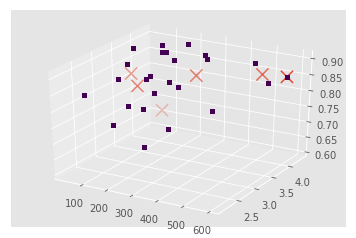

In [146]:
#Fazendo o cluster

from collections import Counter

X = dados.values
cluster_num = 6

kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("centroids : ")
print(centroids)
print("labels : ")
print(labels)

color = ["g.", "r.", "b.", "y.", "p."]

color = np.random.rand(cluster_num)

c = Counter(labels)


fig = figure()
ax = fig.gca(projection='3d')


for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=color[labels[i]])

ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100)

plt.show()

Após fazer várias filtrgens e classificações na base de dados, é possivel fazer o cluster e obter o gráfico mostrado acima, que mostra, através das marcas, regiões onde ficam os celulares com base em seu preço e rating de avaliações. A classificação feita das avaliações, amplia a precisão do gráfico, sendo esta o terceiro eixo. Percebe-se que muitas vezes coincide um rating baixo de um celular com uma média baixa do classificador, o que demonstra a precisão da classificação.